# 第三章 深度神经网络基础

## 一、监督学习（Supervised Learning）和无监督学习（Unsupervised Learning）

### 1、监督学习和无监督学习的区别
  
  监督学习需要将建立好的模型提前对输入数据和对应的标签数据进行训练，从而找到它们之间的最优映射关系，输入新数据后，可以快速预测这组数据的标签。而无监督学习则是对没有标签的输入数据进行训练，在不干涉的情况下得到一个数据之间隐藏的映射关系。所以无监督学习认为参与的更少，更贴近人工智能的设想。

### 2、监督学习

  在实际应用中有两个问题使用监督学习频率最高，回归问题和分类问题。
  
- **回归问题**
    
    回归问题就是建立一个线性映射关系，让模型能够对新输入的数据进行预判。举一个例子就是房价和房子面积关系，如图3-1所示。
    
    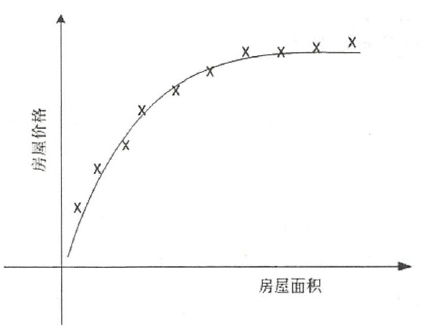
    
    $$图3-1$$ 
    图中曲线是通过前面的数据点拟合出来的线性映射模型。
    
    
- **分类问题**
    
    分类问题就是通过对数据的训练，最终建立一个离散的映射关系。如图3-2表示肿瘤尺寸大小和肿瘤种类的分类模型。
    
    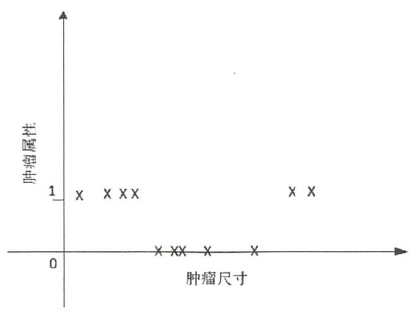
    
    $$图3-2$$
    
    这是一个二分类模型，数据的标签只有两个。也可以改成多分类模型，但是相对会比较复杂。比如把肿瘤种类分为4类，0对应良性，1、2、3分别对应一、
   
   二、三类肿瘤，当然我们也需要调整用于输入的训练数据。
    
### 3、无监督学习

无监督学习主要依靠计算机自己寻找数据中隐藏的特征映射模型。如图3-3为监督学习和无监督学习分类效果。
  
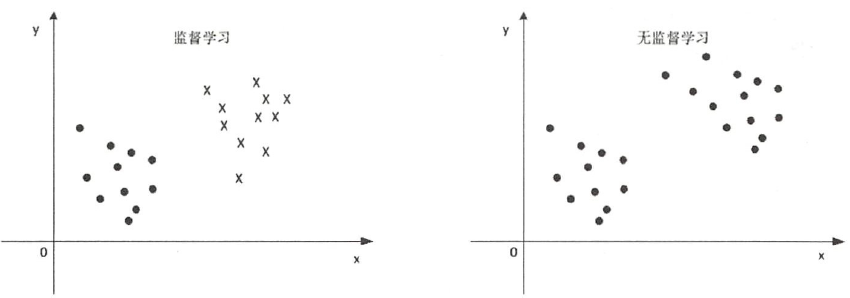
  
$$图3-3 监督学习和无监督学习的分类效果$$
  
从图中可以看到，左边是一个监督学习的二分类模型，因为每一个数据都有自己唯一对应的标签。右图是无监督学习的过程，最终也被分成了两类，但没有相应的
 
数据标签，同一使用原点表示，就像实现了将具有类似特征的数据聚集到一起，所以无监督学习实现的分类问题也叫聚类。
  
## 二、欠拟合和过拟合

欠拟合和过拟合可以作为我们判断搭建模型的拟合程度的指标。

### 1、欠拟合


- **i)什么是欠拟合**

    通过一幅图的对比就知道了，如图3-4所示。

    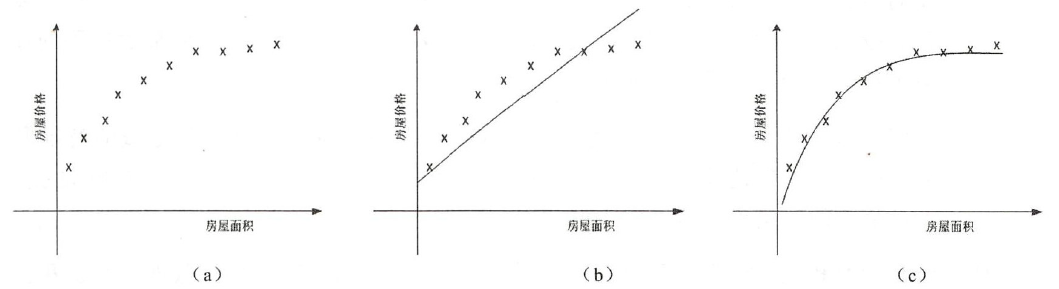

    $$图3-4 欠拟合情况$$

    仍然以房屋价格和面积作为实例，如图3-4(a)，表示房屋价格和面积关系的数据，(b)所示就是一个欠拟合模型，可以看到欠拟合模型对新输入的数据预测的不准  确，这就是欠拟合模型的缺点。（c）是一个较好的拟合模型。
    

- **ii)怎么解决欠拟合问题**

    1、加入特征项：大部分欠拟合是因为没有没有准确把握数据之间的主要特征，所以可以加入和数据有关的特征来训练搭建的模型，这样得到的模型会有更好的泛化能力。

    2、增加函数的次数：这个好理解，一次函数是一条直线，二次函数是一条抛物线，增加函数的次数也可以提高模型的泛化能力。

    3、减少正则参数：正则参数的出现是为了防止过拟合情况的，但是如果我们的模型就是欠拟合的话就可以减少正则参数来消除欠拟合。
    

- **iii)什么试过拟合**

    还是通过一个实例来直观地感受下模型过拟合的情况。
    
    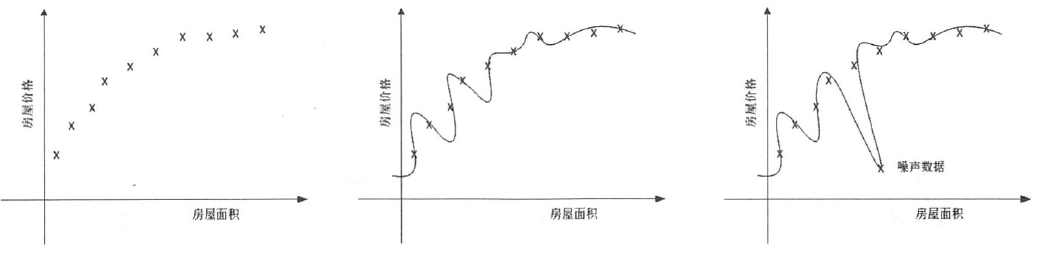

    $$图3-5 过拟合情况$$

    如图3-5所示，（a）图是房屋价格的原始数据，（b）所示就是一个过拟合的模型，可以看到这个模型过度捕捉了原数据的特征，它不但不能准确的预测新输入
    的数据，而且受原数据中的噪声数据影响十分严重，（c）图中有一个噪声系数严重偏离了既定的数据轨道，它带来的影响是灾难性的。


- **iiii)怎么解决过拟合问题**

    出现过拟合的原因是，用于训练模型的数据太少，搭建的模型过度捕捉有限数据之间的特征，是的模型出现过度拟合的情况。解决过拟合问题有三种方法。

    1、 增大训练的数据量：增加了模型的训练数据量后，模型自然能捕捉数据更多的特征，不在过分依赖个别数据的特征。

    2、采用正则化方法：正则化一般在目标函数后面加上范数，防止模型过拟合，最常用到的正则化方法有L0正则、L1、L2正则。

    3、Dropout方法：在神经网络使用频繁，主要是前向传播中在指定的网络层中随机选择和丢弃部分神经网络。

## 三、后向传播

后向传播主要是一个对模型参数进行微调的过程，如果把搭建的模型看成是一个函数f的话，那个后向传播就可以看成是函数f对每个参数的求偏导。下面看一个实例。

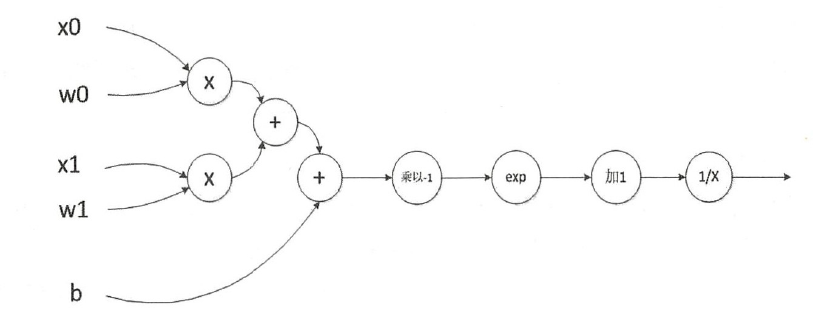

$$图3-6 初级神经网络$$

如图3-6所示的一个初级神经网络结构，其前向传播的计算函数为：

$$f = \frac{1}{{1 + {e^{ - ({x_0}{w_0} + {x_1}{w_1} + b)}}}}$$

此函数参数有x0和x1，对它们分别求偏导：

$$\frac{{\partial f}}{{\partial {x_0}}} = \frac{{ - {e^{ - ({x_0}{\omega _0} + {x_1}{\omega _1} + b)}}}}{{{{\left[ {1 + {e^{ - ({x_0}{\omega _0} + {x_1}{\omega _1} + b)}}} \right]}^2}}} \cdot ( - {\omega _0})$$

$$\frac{{\partial f}}{{\partial {x_0}}} = \frac{{ - {e^{ - ({x_0}{\omega _0} + {x_1}{\omega _1} + b)}}}}{{{{\left[ {1 + {e^{ - ({x_0}{\omega _0} + {x_1}{\omega _1} + b)}}} \right]}^2}}} \cdot ( - {\omega _1})$$

如果对函数参数和权重值赋值:$${x_0} = 1,{x_1} = 1,b =  - 1;{\omega _0} = 0.5,{\omega _1} = 0.5$$

就可以求得后向传播微调值分别为：

  $$\eqalign{
  & \frac{{\partial f}}{{\partial {x_0}}} = 0.125  \cr 
  & \frac{{\partial f}}{{\partial {x_1}}} = 0.125 \cr} $$
  
  ## 四、损失和优化
  
  
- **名词解释**

    损失：用来度量我们得到的模型预测值和真实数据值之间的差距，也通常用来度量模型的泛化能力。

    优化：在模型不过拟合的情况下尽可能的降低损失值。
    

- **优化过程**
    
     一个模型的预测值和真实值可能存在差值，尤其是第一轮差值在大多数情况下都很大，这个差值叫做损失值，这时候我们需要将模型的参数进行优化更新，然
        
     后进行第二轮预测值和真实值差值计算，如此循环，最后得到理想的模型。其中进行损失值计算的函数叫做损失函数，进行优化的函数叫做优化函数。


- **损失函数**
 
    - **均方误差函数（Mean Square Error,简称MSE）**
    
    MSE函数计算的是预测值和真实值差平方的期望值，得到的期望值越小，说明模型的预测值更加精确，其表达式为：
    
    $$MSE = \frac{1}{N}\sum\limits_{i = 1}^n {{{(y_{ture}^i - y_{pred}^i)}^2}} $$
    
    - **均方根误差函数（Root Mean Square Error，简称RMSE）**
    
    RMSE函数计算MSE的算数平方根。
    
    $$RMSE = \sqrt {\frac{1}{N}\sum\limits_{i = 1}^n {{{(y_{ture}^i - y_{pred}^i)}^2}} } $$
    
    同样，RMSE值越小，说明模型具有更精确的预测值。
        
    - **平均绝对误差问题（Mean Absolute Error，简称MAE）**
    
    其数学表达式为：
    
    $$MAE = \frac{1}{N}\sum\limits_{i = 1}^n {\left| {(y_{ture}^i - y_{pred}^i)} \right|} $$
    
- **优化函数**

    在实际的优化过程中，我们还需要面对参数的初始化、参数以何种方式微调、如何选取合适的学习速率等问题，所以优化函数可以看做是以上问题的解决方案集合。最常用到的是一阶优化函数，就是求解的是参数的一阶导数。实际上，我们常常把参数的偏导数写成梯度的形式，所以优化过程又叫做参数的梯度更新。

    - **梯度下降（Gradient Descent）**
    
    全局梯度下降的参数更新公式为：
    
    $${\theta _j} = {\theta _j} - \eta  \times \frac{{\partial J({\theta _j})}}{{\partial {\theta _j}}}$$
    
    其中，${{\theta _j}}$是参数，η是学习效率，它用于控制更新的快慢，J(${{\theta _j}}$)是损失函数。因为全局的梯度下降是针对整个训练数据而言的，所以计算损失值的时间成本和模型训练的复杂度都大大增加了。
    
    - **批量梯度下降（Batch Gradient Descent）**
    
    为了避免全局梯度下降的弊端，有人提出了批量梯度下降，顾名思义，把训练模型的整个数据集分成大小差不多的小数据集，每个小数据集叫做一个批量。每次都用一个批量计算损失值，并以这个损失值为基准对所有的参数进行梯度更新，然后使用下一个批量数据集，重复这个工作，知道所有的批量全部用完。
    
    假设划分出来的批量个数为m个，其中的一个批量包含batch个数据，那么批量梯度下降的参数更新公式为：
    
   $${\theta _j} = {\theta _j} - \eta  \times \frac{{\partial {J_{batch}}({\theta _j})}}{{\partial {\theta _j}}}$$
    
    和全局梯度下降法的区别就是计算损失值的函数改成了${{J_{batch}}({\theta _j})}$，计算损失值的时间成本和模型训练的复杂度大大下降了。但是也有一个小问题，因为使用的是每个批量计算损失值，所以极容易造成局部最优的情况。
    
    - **随机梯度下降（Stochastic Gradient Descent）**
    
    在参与模型训练的数据集中随机选取大小合适的一部分来训练模型，这样也可以大大减少计算损失值的时间成本和魔性训练的复杂度，而且与整个参与训练的数据集没有关系。
    
    假设选取的一部分数据集包含stochastic个数据，那么随机梯度下降的参数更新公式如下：
    
    $${\theta _j} = {\theta _j} - \eta  \times \frac{{\partial {J_{stochastic}}({\theta _j})}}{{\partial {\theta _j}}}$$
    
    和批量随机梯度下降一样，与全局梯度下降相比就是把损失函数改成了${{J_{stochastic}}({\theta _j})}$。虽然随机梯度下降法减少了计算损失值的时间成本和模型的训练复杂度，但是由于参与训练的数据集是随机选取的，所以受到噪声数据影响很大，导致出现较大的波动，也容易最终导致局部最优解的情况。
    
    - **Adam(Adaptive Moment Estimation，自适应时刻估计法）**
    
    这种方法通过让每个参数获得自适应的学习率，达到优化质量和速度双重提升。比如刚开始的时候损失值较大，这时需要较大的学习率让参数获得大梯度的更新，到了后期损失值变小了，需要选择较小的学习率。
    
    
- **激活函数**

  - **什么是激活函数（Activation Function）**

   在没有引入激活函数之前，我们搭建的模型在处理非线性问题上具有很大的局限性，激活函数给我们带来了非线性因素。举一个例子说明一下，比如，有一个一层神经网络的数学模型为：
   
   $$f(x) = W \cdot X + b$$
   
   其中b是偏置参数，有了偏置参数之后直线就偏离的原点，较于经过原点的直线它更具有泛化能力。但是尽管如此，它依然智能处理线性问题。定义一个函数max（）：比较输入数据的最大值a和0的大小，如果a<0，则输出0；如果a>0，输出保留a。将max函数添加到搭建的模型上，则模型就变成了：
   
   $$f(x) = \max (W \cdot X + b,0)$$
   
   激活函数的引入使我们搭建的模型能处理更复杂的问题，所以通过引入不同的激活函数我们就能得到复杂多变的深度神经网络。下面学习三种常用的非线性激活函数。
   
  - **Sigmoid（S型）**
   
   Sigmoid函数的数学表达式为：
   
   $$f(x) = \frac{1}{{1 + {e^{ - x}}}}$$
   
   根据Sigmoid函数，我们可以求得Sigmoid函数的导函数如下：
   
   $${f^1}(x) = \frac{{{e^{ - x}}}}{{{{(1 + {e^{ - x}})}^2}}}$$
   
   根据Sigmoid和Sigmoid导函数，我们不难得到它们的几何图形，如图3-7所示，蓝色曲线为Sigmoid函数，红色曲线为Sigmoid导数。
   
   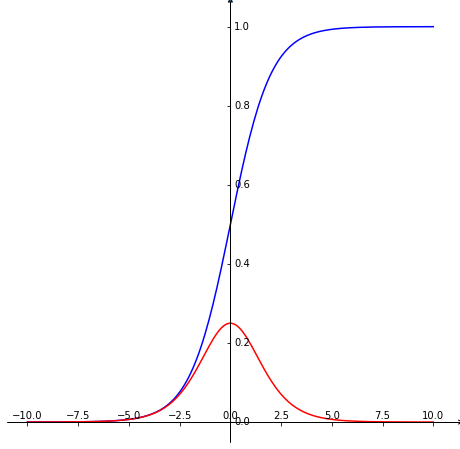
   
   $$图3-7 Sigmoid及其导函数几何图形$$
   
   从图中不难看出来，Sigmoid导函数最大只能取到0.25，后向传播取微调值时最大只能到0.25，这是Sigmoid函数最大的缺点，会导致模型的梯度消失。比如，模型是一个4层的深度神经网络，在后向传播的过程中，每逆向经过一个节点，就要乘上参数的偏导数，而最大的偏导数才只能取到0.25，所以一次后向传播梯度就变成原来的$\frac{1}{{64}}$，梯度几近消失。
   
   这里猜测一下什么是**收敛速度**，当计算出误差值之后，模型需要进行优化，全局梯度下降法需要对所有的数据集计算损失值，每一次迭代时间久，所以收敛速度慢，批量梯度下降法计算误差值速度快些，迭代的速度快，以此类推，随机自适应梯度下降法迭代速度也很快，所以模型的收敛速度就是计算误差值的速度。这有可能是错误的理解，到时候再来纠正，暂时先这样理解。所以在选取参与模型的相关计算时要尽量使用**零中心**数据。
   
   这里首先需要给**收敛速度**做一个诠释。模型的最优解即是模型参数的最优解。通过逐轮迭代，模型参数会被更新到接近其最优解。这一过程中，迭代轮次多，则我们说模型收敛速度慢；反之，迭代轮次少，则我们说模型收敛速度快。所以收敛速度就是参数迭代的次数。而如果不选择零中心数据作为参与模型计算的话，当需要乘以一个负数或者0的时候，就必须进行多次迭代才能达到最优解。
   
  - **tanh函数**
   
   激活函数tanh的表达式为：
   
   $$f(x) = \frac{{{e^x} - {e^{ - x}}}}{{{e^x} + {e^{ - x}}}}$$
   
   推断出tanh的导函数表达式为：
   
   $${f^1}(x) = \frac{{4{e^x}{e^{ - x}}}}{{{{({e^x} + {e^{ - x}})}^2}}}$$
   
   通过tanh的表达式，不难得出tanh和导函数的几何图像如图3-8所示。
   
   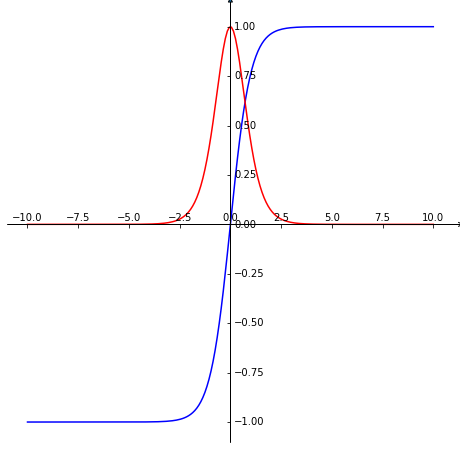
   
   $$图3-8 tanh和导函数几何图像$$
   
   tanh的输出值是零中心的，所以解决了收敛速度变慢的问题。但是tanh的导函数取值在0-1，仍然不够大，所以在后向传播时依然可能出现梯度消失的情况。
   
  - **ReLU(Rectified Linear Unit，修正线性单元）** 
   
   ReLU是深度神经网络使用最频繁的激活函数，数学表达式为：
   
   $$f(x) = \max (0,x)$$
   
   非常简单的函数，将输入x与0比较大小，比0小输出0，否则输出x。图3-9表示ReLU几何图像。
   
   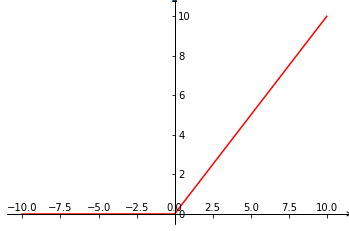
   
   ReLU并不是零中心函数，**这可能导致有些神经网络永远无法被激活，这一般是由于输入的是全正或全负的值或者后向传播过程中学习速率太快导致的**。其解决办法是使用更高级的参数初始化方法Xavier，并且设置合理的学习速率，一般可以使用自适应算法Adam。
   
   

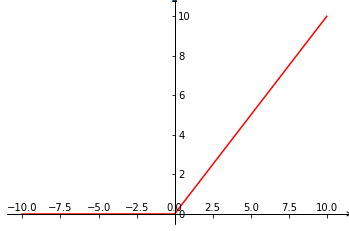

In [16]:
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist as axisartist
import numpy as np

fig = plt.figure(figsize=(6, 4))
#使用axisartist.Subplot方法创建一个绘图区对象ax
ax = axisartist.Subplot(fig, 111)  
#将绘图区对象添加到画布中
fig.add_axes(ax)
#通过set_visible方法设置绘图区所有坐标轴隐藏
ax.axis[:].set_visible(False)
#ax.new_floating_axis代表添加新的坐标轴
ax.axis["x"] = ax.new_floating_axis(0,0)
#给x坐标轴加上箭头
ax.axis["x"].set_axisline_style("->", size = 1.0)

#添加y坐标轴，且加上箭头
ax.axis["y"] = ax.new_floating_axis(1,0)
ax.axis["y"].set_axisline_style("-|>", size = 1.0)

#设置x、y轴上刻度显示方向
ax.axis["x"].set_axis_direction("top")
ax.axis["y"].set_axis_direction("right")


x = np.linspace(0,10,100)
y = x
plt.plot(x, y, c = 'red')
x = np.linspace(-10,0,100)
y = x*0
plt.plot(x, y, c = 'red')
plt.show()

# x = np.linspace(-10,10,200)
# y = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
# plt.plot(x, y, c = 'b')
# # plt.show()
# x = np.linspace(-10,10,200)
# y = 4*np.exp(x)*np.exp(-x)/(np.exp(x)+np.exp(-x))**2
# plt.plot(x, y, c = 'red')
# plt.show()

#多行注释：选中多行按clt+/
# x = np.linspace(-10,10,200)
#  y = 1/(1+np.exp(-x))
# plt.plot(x,y,c = 'b')
# plt.show()
# x = np.linspace(-10,10,200)
# y = np.exp(-x)/((1+np.exp(-x)))**2
# plt.plot(x,y,c = 'r')
# plt.show()
